# Gerador de Sinal FSK

Este notebook tem como objetivo implementar um gerador de sinal FSK (Frequency Shift Keying) com base em parâmetros configuráveis, apresentando uma explicação teórica robusta e análise visual completa.
Além da geração básica do sinal FSK, são exploradas comparações com outras formas de modulação digital (ASK e PSK), bem como a simulação de um canal ruidoso com cálculo de BER (Bit Error Rate), proporcionando uma análise mais profunda.

## Fundamentos Teóricos

A modulação FSK (Frequency Shift Keying) é uma técnica de modulação digital na qual a frequência de uma portadora senoidal é alterada em função dos dados binários a serem transmitidos.

- Um bit `'0'` é representado por uma frequência `f0`;
- Um bit `'1'` é representado por uma frequência `f1`.

### Aplicações Comuns
- Transmissão de dados em canais ruidosos
- Sistemas RFID e LoRa
- Comunicação por rádio de baixa taxa
- Módems analógicos antigos

### Representação Matemática

A equação do sinal FSK é dada por:

$$
s(t) = A \cdot \sin(2\pi f_b t), \quad \text{onde} \quad 
f_b =
\begin{cases}
f_1, & \text{se } b(t) = 1 \\
f_0, & \text{se } b(t) = 0
\end{cases}
$$

**Em que:**
- \( A \) é a amplitude da portadora  
- \( f_0 \) e \( f_1 \) são as frequências para bits 0 e 1  
- \( b(t) \) é a função binária que representa os dados


## Importação de Bibliotecas e Definição de Parâmetros

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from typing import Tuple, List

In [21]:
# Parâmetros de configuração
BIT_RATE = 10           # Taxa de bits (bits por segundo)
SAMPLE_RATE = 1000      # Taxa de amostragem (Hz)
AMPLITUDE = 1.0         # Amplitude do sinal
FREQ_BIT_0 = 5          # Frequência para representar o bit 0 (Hz)
FREQ_BIT_1 = 15         # Frequência para representar o bit 1 (Hz)

# Sequência de bits a ser transmitida
SEQUENCIA_BITS = [1, 0, 1, 1, 0, 0, 1]

## Geração do Sinal FSK

A seguir, implementamos a função `gerar_sinal_fsk`, responsável por gerar o sinal FSK com base na sequência de bits de entrada. A função utiliza frequências diferentes para representar os bits 0 e 1, conforme os parâmetros definidos anteriormente.


In [22]:
def gerar_sinal_fsk(bits: List[int],
                    f0: float,
                    f1: float,
                    bit_rate: float,
                    sample_rate: int,
                    amplitude: float = 1.0) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gera um sinal FSK (Frequency Shift Keying) a partir de uma sequência de bits.

    Args:
        bits (List[int]): Sequência binária contendo apenas 0s e 1s.
        f0 (float): Frequência associada ao bit 0 (Hz).
        f1 (float): Frequência associada ao bit 1 (Hz).
        bit_rate (float): Taxa de bits (bits por segundo).
        sample_rate (int): Taxa de amostragem do sinal (Hz).
        amplitude (float, optional): Amplitude da onda senoidal. Default é 1.0.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Vetores com o tempo total e o sinal FSK correspondente.
    """
    tempo_por_bit = 1 / bit_rate
    sinal = []
    tempo = []

    for i, bit in enumerate(bits):
        t = np.linspace(i * tempo_por_bit,
                        (i + 1) * tempo_por_bit,
                        int(sample_rate * tempo_por_bit),
                        endpoint=False)
        freq = f1 if bit == 1 else f0
        s = amplitude * np.sin(2 * np.pi * freq * t)

        sinal.extend(s)
        tempo.extend(t)

    return np.array(tempo), np.array(sinal)


## Visualização do Sinal FSK no Tempo

A partir da sequência de bits e dos parâmetros definidos, vamos gerar o sinal FSK e visualizá-lo em um gráfico de tempo. Isso permite verificar a transição entre as diferentes frequências (f0 e f1) conforme os bits 0 e 1 são modulados.


In [23]:
# Geração do sinal FSK
tempo_fsk, sinal_fsk = gerar_sinal_fsk(
    bits=SEQUENCIA_BITS,
    f0=FREQ_BIT_0,
    f1=FREQ_BIT_1,
    bit_rate=BIT_RATE,
    sample_rate=SAMPLE_RATE,
    amplitude=AMPLITUDE
)

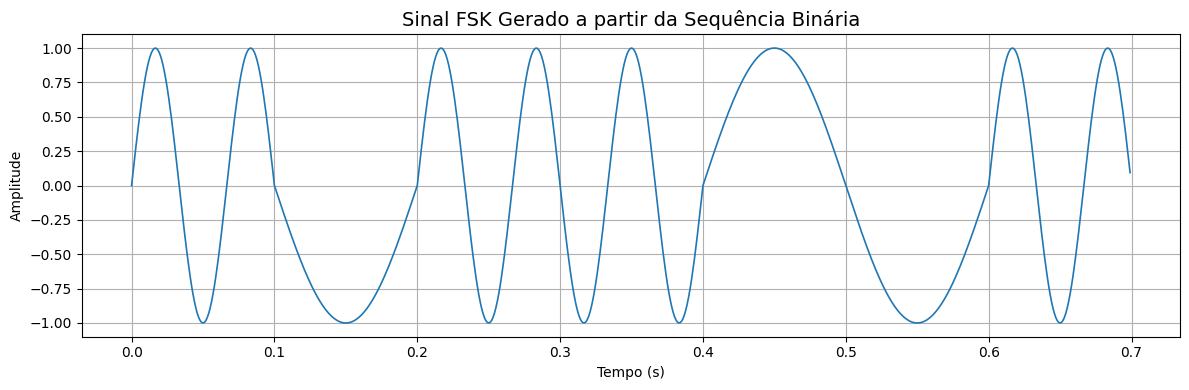

In [24]:
# Plotagem do sinal no tempo
plt.figure(figsize=(12, 4))
plt.plot(tempo_fsk, sinal_fsk, linewidth=1.2)
plt.title("Sinal FSK Gerado a partir da Sequência Binária", fontsize=14)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


## Análise Espectral (FFT)

A Transformada Rápida de Fourier (FFT) permite visualizar o conteúdo espectral do sinal FSK. Como estamos alternando entre duas frequências (f0 e f1), esperamos picos nítidos nessas frequências no espectro.

Essa análise é essencial para compreender como os sinais se comportam no domínio da frequência, especialmente em canais de comunicação.


In [25]:
def plot_fft(signal: np.ndarray,
             sample_rate: int,
             title: str = "Espectro de Frequência") -> None:
    """
    Plota o espectro de frequência de um sinal utilizando FFT.

    Args:
        signal (np.ndarray): Vetor com o sinal no tempo.
        sample_rate (int): Taxa de amostragem utilizada (Hz).
        title (str): Título do gráfico.
    """
    N = len(signal)
    fft_result = fft(signal)
    freqs = fftfreq(N, 1 / sample_rate)

    plt.figure(figsize=(12, 4))
    plt.plot(freqs[:N // 2], np.abs(fft_result[:N // 2]) * 2 / N)
    plt.title(title, fontsize=14)
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

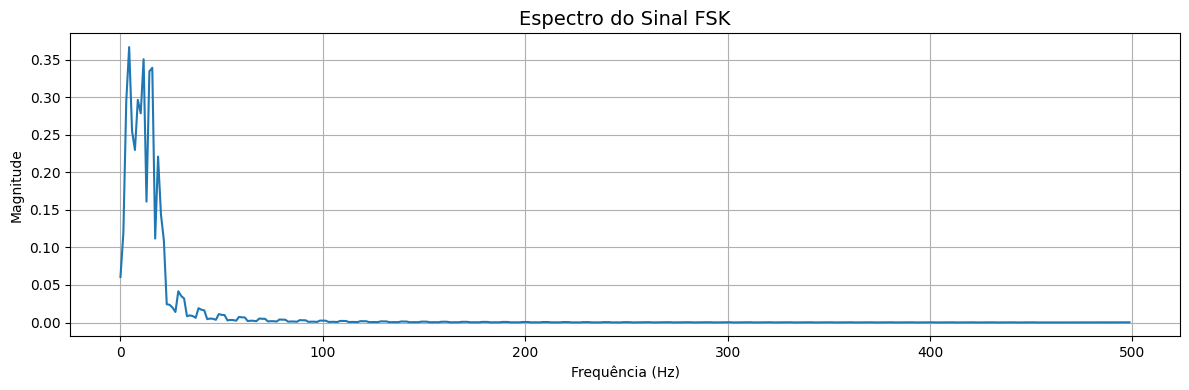

In [26]:
plot_fft(sinal_fsk, SAMPLE_RATE, title="Espectro do Sinal FSK")

## Comparação entre Modulações Digitais: FSK, ASK e PSK

Nesta seção, serão implementadas as três principais modulações digitais binárias:

- **FSK**: variação da frequência para bits 0 e 1
- **ASK**: variação da amplitude para bits 0 e 1
- **PSK**: variação da fase da portadora para bits 0 e 1

Essa comparação permite compreender diferenças na construção dos sinais e suas implicações na transmissão digital.


In [27]:
def gerar_sinal_ask(bits: List[int],
                    freq: float,
                    bit_rate: float,
                    sample_rate: int,
                    amp0: float = 0.0,
                    amp1: float = 1.0) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gera um sinal ASK (Amplitude Shift Keying) a partir de uma sequência de bits.

    Args:
        bits (List[int]): Sequência binária.
        freq (float): Frequência fixa da portadora (Hz).
        bit_rate (float): Taxa de bits (bps).
        sample_rate (int): Taxa de amostragem (Hz).
        amp0 (float): Amplitude para bit 0.
        amp1 (float): Amplitude para bit 1.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Tempo e sinal ASK.
    """
    tempo_por_bit = 1 / bit_rate
    sinal = []
    tempo = []

    for i, bit in enumerate(bits):
        t = np.linspace(i * tempo_por_bit,
                        (i + 1) * tempo_por_bit,
                        int(sample_rate * tempo_por_bit),
                        endpoint=False)
        amp = amp1 if bit == 1 else amp0
        s = amp * np.sin(2 * np.pi * freq * t)
        sinal.extend(s)
        tempo.extend(t)

    return np.array(tempo), np.array(sinal)


def gerar_sinal_psk(bits: List[int],
                    freq: float,
                    bit_rate: float,
                    sample_rate: int,
                    amplitude: float = 1.0) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gera um sinal PSK (Phase Shift Keying) a partir de uma sequência de bits.

    Args:
        bits (List[int]): Sequência binária.
        freq (float): Frequência da portadora (Hz).
        bit_rate (float): Taxa de bits (bps).
        sample_rate (int): Taxa de amostragem (Hz).
        amplitude (float): Amplitude da onda.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Tempo e sinal PSK.
    """
    tempo_por_bit = 1 / bit_rate
    sinal = []
    tempo = []

    for i, bit in enumerate(bits):
        t = np.linspace(i * tempo_por_bit,
                        (i + 1) * tempo_por_bit,
                        int(sample_rate * tempo_por_bit),
                        endpoint=False)
        fase = 0 if bit == 1 else np.pi
        s = amplitude * np.sin(2 * np.pi * freq * t + fase)
        sinal.extend(s)
        tempo.extend(t)

    return np.array(tempo), np.array(sinal)

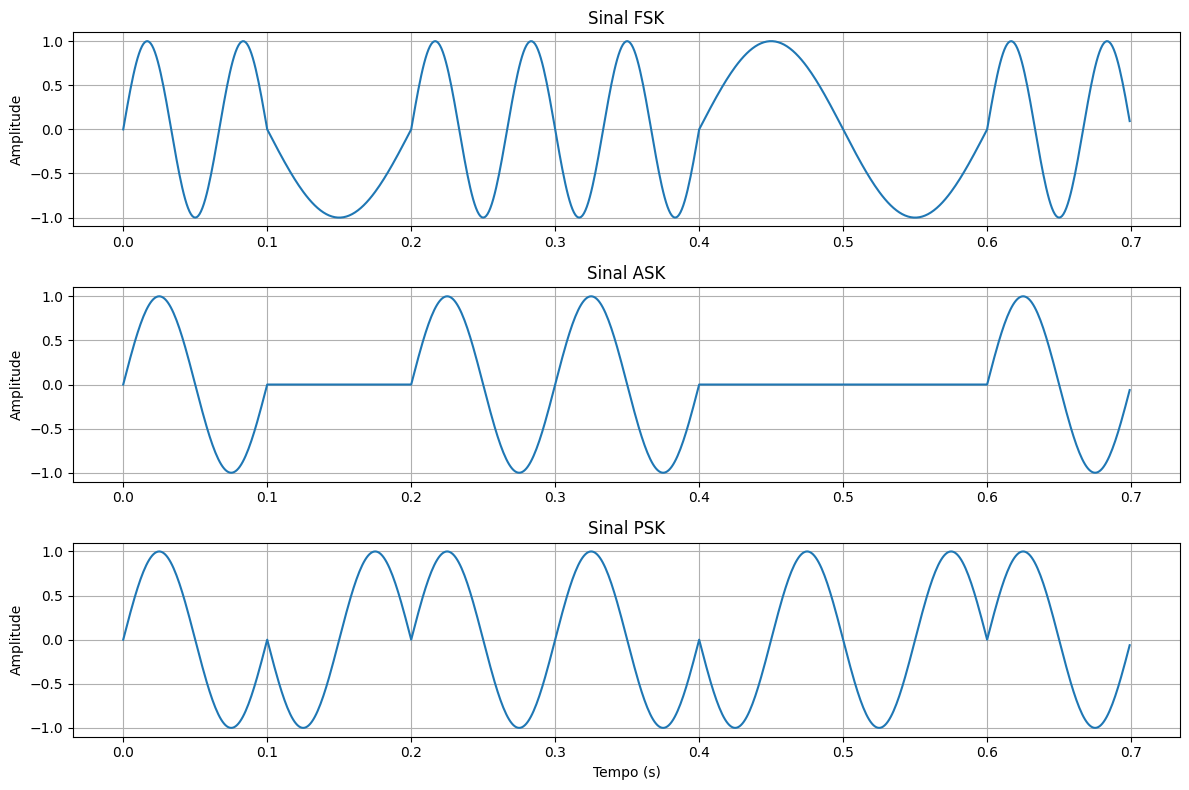

In [28]:
# Gerar os três sinais para a mesma sequência de bits
tempo_ask, sinal_ask = gerar_sinal_ask(SEQUENCIA_BITS, freq=10, bit_rate=BIT_RATE, sample_rate=SAMPLE_RATE)
tempo_psk, sinal_psk = gerar_sinal_psk(SEQUENCIA_BITS, freq=10, bit_rate=BIT_RATE, sample_rate=SAMPLE_RATE)

# Visualização conjunta
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(tempo_fsk, sinal_fsk)
plt.title("Sinal FSK")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tempo_ask, sinal_ask)
plt.title("Sinal ASK")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tempo_psk, sinal_psk)
plt.title("Sinal PSK")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


## Canal Ruidoso + Cálculo do BER (Bit Error Rate)

Nesta seção, simulamos a transmissão do sinal FSK através de um canal ruidoso do tipo AWGN (Additive White Gaussian Noise). Em seguida, implementamos um demodulador simples para tentar recuperar os bits e calcular a taxa de erro (BER).

Este tipo de análise é fundamental em comunicações digitais, pois permite estimar a robustez de uma modulação em cenários reais de interferência e ruído.


In [29]:
def adicionar_ruido_awgn(signal: np.ndarray, snr_db: float) -> np.ndarray:
    """
    Adiciona ruído branco gaussiano (AWGN) a um sinal.

    Args:
        signal (np.ndarray): Sinal original sem ruído.
        snr_db (float): Relação sinal-ruído desejada em decibéis.

    Returns:
        np.ndarray: Sinal com ruído adicionado.
    """
    snr_linear = 10 ** (snr_db / 10)
    power_signal = np.mean(signal ** 2)
    power_noise = power_signal / snr_linear
    noise = np.random.normal(0, np.sqrt(power_noise), size=signal.shape)
    return signal + noise


In [30]:
def demodular_fsk_basico(signal: np.ndarray,
                         bit_rate: float,
                         sample_rate: int,
                         f0: float,
                         f1: float) -> List[int]:
    """
    Realiza uma demodulação FSK simples usando energia de frequência.

    Args:
        signal (np.ndarray): Sinal FSK com ruído.
        bit_rate (float): Taxa de bits (bps).
        sample_rate (int): Taxa de amostragem (Hz).
        f0 (float): Frequência do bit 0 (Hz).
        f1 (float): Frequência do bit 1 (Hz).

    Returns:
        List[int]: Bits decodificados.
    """
    tempo_por_bit = 1 / bit_rate
    amostras_por_bit = int(sample_rate * tempo_por_bit)
    bits_demodulados = []

    for i in range(0, len(signal), amostras_por_bit):
        segmento = signal[i:i + amostras_por_bit]

        if len(segmento) != amostras_por_bit:
            continue

        t = np.linspace(0, tempo_por_bit, amostras_por_bit, endpoint=False)
        ref_f0 = np.sin(2 * np.pi * f0 * t)
        ref_f1 = np.sin(2 * np.pi * f1 * t)

        energia_f0 = np.sum(segmento * ref_f0)
        energia_f1 = np.sum(segmento * ref_f1)

        bit_estimado = 1 if energia_f1 > energia_f0 else 0
        bits_demodulados.append(bit_estimado)

    return bits_demodulados


In [31]:
def calcular_ber(bits_original: List[int], bits_recebidos: List[int]) -> float:
    """
    Calcula a taxa de erro de bits (BER).

    Args:
        bits_original (List[int]): Bits transmitidos.
        bits_recebidos (List[int]): Bits estimados na recepção.

    Returns:
        float: Taxa de erro de bits (0.0 a 1.0).
    """
    n = min(len(bits_original), len(bits_recebidos))
    erros = sum(1 for i in range(n) if bits_original[i] != bits_recebidos[i])
    return erros / n


In [32]:
# Adicionar ruído ao sinal FSK
snr_desejado = 5  # SNR em dB
sinal_fsk_ruido = adicionar_ruido_awgn(sinal_fsk, snr_db=snr_desejado)

# Demodular o sinal ruidoso
bits_estimados = demodular_fsk_basico(sinal_fsk_ruido, BIT_RATE, SAMPLE_RATE, FREQ_BIT_0, FREQ_BIT_1)

# Calcular BER
ber = calcular_ber(SEQUENCIA_BITS, bits_estimados)

print(f"Taxa de erro de bits (BER) para SNR = {snr_desejado} dB: {ber:.4f}")


Taxa de erro de bits (BER) para SNR = 5 dB: 0.4286


## Conclusões

Este trabalho apresentou a implementação de um gerador de sinal FSK, com visualização completa no domínio do tempo e da frequência.

Além da entrega solicitada, foram incluídas duas extensões importantes:
- **Comparação entre as modulações digitais FSK, ASK e PSK**, evidenciando suas diferenças estruturais e de comportamento;
- **Simulação de canal ruidoso (AWGN) e cálculo da BER (Bit Error Rate)**, mostrando a robustez da modulação FSK frente a interferências.
